In [3]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [13]:

from utilities import visualize_classifier


ModuleNotFoundError: No module named 'utilities'

In [14]:
#Define sample input data
X = np.array([[3.1, 7.2], [4,6.7],[2.9,8],[5.1,4.5],[6,5], [5.6,5],[3.3,0.4],[3.9,0.9],[2.8,1],[0.5,3.4],[1,4],[0.6,4.9]])

In [15]:
y = np.array([0,0,0,1,1,1,2,2,2,3,3,3])

In [22]:
# Create the logistic regression classifier
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)

In [23]:
#train the classifier
classifier.fit (X,y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
def visualize_classifier (classifier, X, y):
    # define the min and max values of X and y
    #that will be used in the mesh grid
    (min_x, max_x) = (X[:,0].min() - 1.0, X[:,0].max()+1.0)
    (min_y, max_y )= (X[:,1].min() - 1.0, X[:,0].max()+1.0)
    #Define the step size to use in plotting the mesh grid
    mesh_step_size = 0.01

    #Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    
    #Run the classifier on the mesh grid
    output= classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    #reshape the output array
    output = output.reshape(x_vals.shape)
    
    #create a plot
    plt.figure()
    
    #choose a color scheme for the plot
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)
    
    #overlay the graining poitns on the plot 
    plt.scatter(X[:,0], X[:,1], c=y, s=75, edgecolors = 'black', linewidth=1, cmap=plt.cm.Paired)
    
    #Specity the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    
    #specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:,0].min()-1),int(X[:,0].max() +1 ),1.0)))
    plt.yticks((np.arange(int(X[:,1].min()-1),int(X[:,1].max() +1 ),1.0)))
    plt.show()




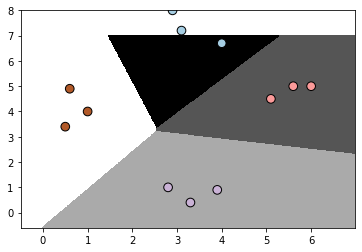

In [25]:
#visualize the performance of the classifier
visualize_classifier(classifier, X,y)

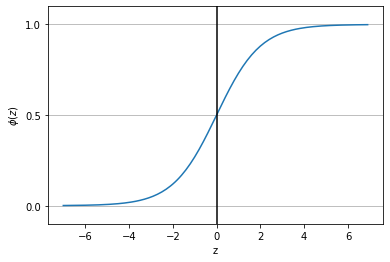

In [26]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

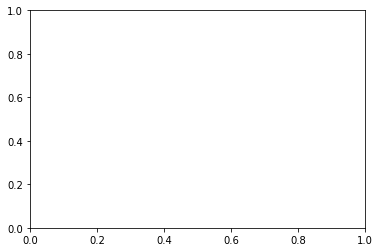

In [38]:
plt.gca()

In [27]:
z.shape

(140,)

In [35]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    cost_ : list
    Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of
        samples and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
        size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""

        return np.where(self.net_input(X) >= 0.0, 1, 0)
    # equivalent to:
    # return np.where(self.activation(self.net_input(X))
    # >= 0.5, 1, 0)

In [36]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000,random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(oc='upper left')
plt.show()

NameError: name 'X_train' is not defined